# $\color{black}{\text{Kapittel 1 - Prosent}}$
Forklare og bruke prosent, prosentpoeng og vekstfaktor til modellering av praktiske situasjoner med digitale verktøy

# $\color{red}{\text{Kapittel 2 - Likninger og ulikheter}}$
Utforske strategier for å løse likninger, likningssystem og ulikheter og argumentere for tenkemåtene sine

# $\color{blue}{\text{Kapittel 3 - Økonomi}}$
Utforske og forklare sammenhenger mellom prisindeks, kroneverdi, reallønn, nominell lønn og brutto- og nettoinntekt

Vurdere valg knyttet til personlig økonomi og reflektere over konsekvenser av å ta opp lån og å bruke kredittkort

In [9]:
# Konsumprisindeks kapittel 2 :)
import ipywidgets as widgets
from IPython.display import display, clear_output, Markdown

# --- STILER OG LAYOUT ---
style = {'description_width': 'initial'}
layout_full = widgets.Layout(width='98%')
layout_half = widgets.Layout(width='48%')

# --- FANE 1: FINN UKJENT VERDI (Forholdstall) ---
# Dekker Oppgave 3.20 og 3.21
# Formel: Pris1 / Indeks1 = Pris2 / Indeks2

lbl_t1_intro = widgets.HTML("<h3>🔍 Finn ukjent Indeks eller Pris (Oppgave 3.20, 3.21)</h3>"
                            "<p>Fyll inn de 3 verdiene du har. La den ukjente stå som 0.</p>")

w_p1 = widgets.FloatText(description="Pris (År 1):", value=0, style=style, layout=layout_half)
w_i1 = widgets.FloatText(description="Indeks (År 1):", value=0, style=style, layout=layout_half)
w_p2 = widgets.FloatText(description="Pris (År 2):", value=0, style=style, layout=layout_half)
w_i2 = widgets.FloatText(description="Indeks (År 2):", value=0, style=style, layout=layout_half)

btn_calc_t1 = widgets.Button(description="Beregn Ukjent", button_style='primary', icon='calculator')
out_t1 = widgets.Output()

def on_calc_t1(b):
    with out_t1:
        clear_output()
        p1, i1 = w_p1.value, w_i1.value
        p2, i2 = w_p2.value, w_i2.value
        
        # Sjekk at vi har nok info (minst 3 tall, og ingen deling på null i nevnerne vi kjenner)
        zeros = [x for x in [p1, i1, p2, i2] if x == 0]
        
        if len(zeros) != 1:
            print("❌ Feil: Du må fylle inn nøyaktig 3 tall. La den ukjente være 0.")
            return

        # Logikk for å finne den ukjente
        res = 0
        formula_text = ""
        
        # Case 1: Vi mangler Indeks 2 (Vanligst)
        if i2 == 0:
            res = (i1 * p2) / p1
            formula_text = f"$$x = \\frac{{Indeks_1 \\cdot Pris_2}}{{Pris_1}} = \\frac{{{i1} \\cdot {p2}}}{{{p1}}}$$"
            result_text = f"**Indeks i år 2 er: {res:.1f}**"
            
        # Case 2: Vi mangler Pris 2
        elif p2 == 0:
            res = (p1 * i2) / i1
            formula_text = f"$$x = \\frac{{Pris_1 \\cdot Indeks_2}}{{Indeks_1}} = \\frac{{{p1} \\cdot {i2}}}{{{i1}}}$$"
            result_text = f"**Prisen i år 2 er: {res:.2f} kr**"

        # Case 3: Vi mangler Indeks 1
        elif i1 == 0:
            res = (i2 * p1) / p2
            formula_text = f"$$x = \\frac{{Indeks_2 \\cdot Pris_1}}{{Pris_2}} = \\frac{{{i2} \\cdot {p1}}}{{{p2}}}$$"
            result_text = f"**Indeks i år 1 var: {res:.1f}**"
            
        # Case 4: Vi mangler Pris 1
        elif p1 == 0:
            res = (p2 * i1) / i2
            formula_text = f"$$x = \\frac{{Pris_2 \\cdot Indeks_1}}{{Indeks_2}} = \\frac{{{p2} \\cdot {i1}}}{{{i2}}}$$"
            result_text = f"**Prisen i år 1 var: {res:.2f} kr**"

        display(Markdown(f"**Utregning:**\n{formula_text}\n\n{result_text}"))

btn_calc_t1.on_click(on_calc_t1)
box_t1 = widgets.VBox([lbl_t1_intro, widgets.HBox([w_p1, w_i1]), widgets.HBox([w_p2, w_i2]), btn_calc_t1, out_t1])

# --- FANE 2: JUSTERE PRIS/LØNN (Reallønn) ---
# Dekker Oppgave 3.24 og 3.25
# Formel: Ny Pris = Gammel Pris * (Ny Indeks / Gammel Indeks)

lbl_t2_intro = widgets.HTML("<h3>💸 Justere beløp etter KPI (Oppgave 3.24, 3.25)</h3>"
                            "<p>Hva tilsvarer et beløp fra et gammelt år i et nytt år?</p>")

w_amount = widgets.FloatText(description="Opprinnelig Beløp (kr):", value=100, style=style, layout=layout_full)
w_old_idx = widgets.FloatText(description="Gammel Indeks:", value=100, style=style, layout=layout_half)
w_new_idx = widgets.FloatText(description="Ny Indeks:", value=110, style=style, layout=layout_half)

btn_calc_t2 = widgets.Button(description="Beregn Ny Verdi", button_style='success', icon='arrow-right')
out_t2 = widgets.Output()

def on_calc_t2(b):
    with out_t2:
        clear_output()
        amt = w_amount.value
        old_i = w_old_idx.value
        new_i = w_new_idx.value
        
        if old_i == 0:
            print("❌ Gammel indeks kan ikke være 0.")
            return
            
        factor = new_i / old_i
        new_amt = amt * factor
        
        formula = f"$$NyVerdi = GammelVerdi \\cdot \\frac{{NyIndeks}}{{GammelIndeks}} = {amt} \\cdot \\frac{{{new_i}}}{{{old_i}}}$$"
        
        display(Markdown(f"**Utregning:**\n{formula}"))
        display(Markdown(f"Vekstfaktor: {factor:.4f}"))
        display(Markdown(f"**Justert beløp: {new_amt:.2f} kr**"))

btn_calc_t2.on_click(on_calc_t2)
box_t2 = widgets.VBox([lbl_t2_intro, w_amount, widgets.HBox([w_old_idx, w_new_idx]), btn_calc_t2, out_t2])

# --- FANE 3: VEKSTFAKTOR & PROSENTVIS ENDRING ---
# Dekker Oppgave 3.22 og 3.23
# Formel: Vekstfaktor = Ny / Gammel. Årlig vekst = (Ny/Gammel)^(1/år)

lbl_t3_intro = widgets.HTML("<h3>📈 Prosentvis endring & Årlig vekst (Oppgave 3.22, 3.23)</h3>"
                            "<p>Beregn stigning i prosent, eller gjennomsnittlig årlig vekst over tid.</p>")

w_val_start = widgets.FloatText(description="Startverdi (Indeks/Pris):", value=100, style=style, layout=layout_half)
w_val_end = widgets.FloatText(description="Sluttverdi (Indeks/Pris):", value=110, style=style, layout=layout_half)
w_years = widgets.IntText(description="Antall år (valgfritt):", value=1, style=style, layout=layout_full)

btn_calc_t3 = widgets.Button(description="Beregn Vekst", button_style='warning', icon='line-chart')
out_t3 = widgets.Output()

def on_calc_t3(b):
    with out_t3:
        clear_output()
        v_start = w_val_start.value
        v_end = w_val_end.value
        years = w_years.value
        
        if v_start == 0:
            print("❌ Startverdi kan ikke være 0.")
            return
            
        # Total vekst
        vf_total = v_end / v_start
        pct_total = (vf_total - 1) * 100
        
        display(Markdown(f"**Total periode:**"))
        display(Markdown(f"$$Vekstfaktor = \\frac{{{v_end}}}{{{v_start}}} = {vf_total:.4f}$$"))
        display(Markdown(f"Endring i prosent: **{pct_total:.1f} %**"))
        
        # Årlig vekst (hvis mer enn 1 år)
        if years > 1:
            vf_annual = (v_end / v_start)**(1/years)
            pct_annual = (vf_annual - 1) * 100
            
            display(Markdown("---"))
            display(Markdown(f"**Gjennomsnittlig per år (over {years} år):**"))
            display(Markdown(f"$$Årlig\\_VF = \\sqrt[{years}]{{\\frac{{{v_end}}}{{{v_start}}}}} = {vf_annual:.4f}$$"))
            display(Markdown(f"Årlig endring: **{pct_annual:.1f} %**"))

btn_calc_t3.on_click(on_calc_t3)
box_t3 = widgets.VBox([lbl_t3_intro, widgets.HBox([w_val_start, w_val_end]), w_years, btn_calc_t3, out_t3])

# --- HOVEDVISNING ---
tabs = widgets.Tab(children=[box_t1, box_t2, box_t3])
tabs.set_title(0, 'Finn Ukjent (x)')
tabs.set_title(1, 'Juster Pris/Lønn')
tabs.set_title(2, 'Vekst & Prosent')

display(Markdown("# 🐍 Matematikkmesterens KPI-Verktøy"))
display(tabs)

# 🐍 Matematikkmesterens KPI-Verktøy

In [2]:
# Pythonprogram til oppgave 3.34
lønn = 32000
KPI = 112.2

reallønn = lønn*100/KPI

print("Reallønna er", round(reallønn), "kr")

Reallønna er 28520 kr


In [ ]:
# Pythonprogram til oppgave 3.218
nominell = 490000
kpi = 110.8
reallønn = nominell*100/kpi

print('Reallønna er',round(reallønn))

In [3]:
# Pythonprogram til oppgave 3.226
x = 250000
rente = 1.5
vekstfaktor = 1 + rente/100
tid = 0

while x < 400000:
  x = x * vekstfaktor
  tid = tid + 1

print('Det er nok penger om', tid, 'år.')

Det er nok penger om 32 år.


In [ ]:
# Pythonprogram til oppgave 7 på side 111
KPI = input("Skriv inn konsumprisindeksen: ")
reallønn = input("Skriv inn reallønna")

nominell_lønn = float(reallønn) * float(KPI) / 100
print("Nominell lønn er:", nominell_lønn)

In [2]:
# Bruttolønn/nettolønn og sparing
import ipywidgets as widgets
from IPython.display import display, clear_output
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick

# Konfigurer plot-stil for et profesjonelt utseende
plt.style.use('seaborn-v0_8-whitegrid')

# -------------------------------------------------------------------------
# LOGIKK FOR SPARING (KAPITTEL 3.5)
# -------------------------------------------------------------------------

def beregn_sparing(startbelop, sparebelop, frekvens, rente, ar, innskudd_start):
    """
    Beregner utviklingen av sparing basert på geometriske rekker og rentesrente.
    """
    r = rente / 100
    n_perioder = ar
    
    # Justering hvis månedlig sparing
    if frekvens == 'Månedlig':
        n_perioder = ar * 12
        periode_rente = (1 + r)**(1/12) - 1 # Reell månedlig rente
        innskudd = sparebelop
    else: # Årlig
        periode_rente = r
        innskudd = sparebelop

    vekstfaktor = 1 + periode_rente
    
    # Vi bruker en løkke for å bygge opp saldoen periode for periode
    perioder = np.arange(0, n_perioder + 1)
    saldoer = np.zeros(n_perioder + 1)
    totalt_innskudd = np.zeros(n_perioder + 1)
    
    saldoer[0] = startbelop
    totalt_innskudd[0] = startbelop
    
    curr_saldo = startbelop
    curr_innskudd = startbelop
    
    for i in range(1, n_perioder + 1):
        # 1. Renter på det som sto fra før (saldoen vokser med vekstfaktoren)
        curr_saldo = curr_saldo * vekstfaktor
        
        # 2. Nytt innskudd
        if innskudd > 0:
            # Hvis innskudd skjer ved START av perioden (f.eks. 1. jan), får det renter i år.
            # Hvis innskudd skjer ved SLUTT av perioden (f.eks. 31. des), får det renter først neste år.
            if innskudd_start:
                tillegg = innskudd * vekstfaktor
            else:
                tillegg = innskudd
            
            curr_saldo += tillegg
            curr_innskudd += innskudd
            
        saldoer[i] = curr_saldo
        totalt_innskudd[i] = curr_innskudd

    df = pd.DataFrame({
        'Periode': perioder,
        'Totalt Innskudd': totalt_innskudd,
        'Renter': saldoer - totalt_innskudd,
        'Total Saldo': saldoer
    })
    
    return df

def plot_sparing(df, ar, frekvens):
    fig, ax = plt.subplots(figsize=(10, 6))
    
    ax.plot(df['Periode'], df['Total Saldo'], label='Total Saldo (m/renter)', color='#2ecc71', linewidth=3)
    ax.plot(df['Periode'], df['Totalt Innskudd'], label='Egne innskudd', color='#3498db', linestyle='--')
    
    ax.fill_between(df['Periode'], df['Totalt Innskudd'], df['Total Saldo'], color='#2ecc71', alpha=0.1, label='Opptjente renter')
    
    tittel_tekst = f"Spareutvikling over {ar} år ({frekvens})"
    ax.set_title(tittel_tekst, fontsize=16)
    ax.set_xlabel(f"Antall {frekvens.lower().replace('lig', 'er')}", fontsize=12)
    ax.set_ylabel("Beløp (NOK)", fontsize=12)
    
    # Formater y-aksen med tusenskille og kr
    ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f} kr'))
    
    ax.legend(fontsize=12)
    ax.set_xlim(0, df['Periode'].max())
    
    # Legg til litt luft over grafen
    if df['Total Saldo'].max() > 0:
        ax.set_ylim(0, df['Total Saldo'].max() * 1.1)
    
    return fig

# -------------------------------------------------------------------------
# LOGIKK FOR LØNN (KAPITTEL 3.4)
# -------------------------------------------------------------------------

def beregn_lonn(timelonn, timer_ord, timer_50, timer_100, skatt_pst, fastlonn=0):
    # Beregninger
    lonn_ord = timelonn * timer_ord
    
    tillegg_50_sats = timelonn * 1.5
    lonn_50 = tillegg_50_sats * timer_50
    
    tillegg_100_sats = timelonn * 2.0
    lonn_100 = tillegg_100_sats * timer_100
    
    brutto = fastlonn + lonn_ord + lonn_50 + lonn_100
    skattetrekk = brutto * (skatt_pst / 100)
    netto = brutto - skattetrekk
    
    # Oppsett av data for visning
    data = {
        'Post': [
            'Fast månedslønn',
            f'Ordinære timer ({timer_ord}t x {timelonn}kr)', 
            f'Overtid 50% ({timer_50}t x {tillegg_50_sats:.1f}kr)', 
            f'Overtid 100% ({timer_100}t x {tillegg_100_sats:.1f}kr)',
            '----------------',
            'BRUTTOLØNN',
            f'Skattetrekk ({skatt_pst}%)',
            '----------------',
            'UTBETALT (NETTO)'
        ],
        'Beløp': [
            fastlonn,
            lonn_ord,
            lonn_50,
            lonn_100,
            np.nan, # Skillelinje
            brutto,
            -skattetrekk,
            np.nan,
            netto
        ]
    }
    return pd.DataFrame(data)

# -------------------------------------------------------------------------
# GUI OPPSETT (WIDGETS)
# -------------------------------------------------------------------------

# --- Widgets for Sparing ---
style = {'description_width': 'initial'}
w_start = widgets.FloatText(value=10000, description='Startbeløp:', step=1000, style=style)
w_spare = widgets.FloatText(value=0, description='Sparebeløp (per periode):', step=500, style=style)
w_frekvens = widgets.Dropdown(options=['Årlig', 'Månedlig'], value='Årlig', description='Frekvens:', style=style)
w_rente = widgets.FloatSlider(value=1.0, min=0.1, max=15.0, step=0.1, description='Rente (%):', style=style)
w_ar = widgets.IntSlider(value=15, min=1, max=50, description='Antall år:', style=style)
w_innskudd_type = widgets.Checkbox(value=True, description='Innskudd settes inn FØRst i perioden (gir renter i år)', style=style)
out_sparing = widgets.Output()

def update_sparing(*args):
    df = beregn_sparing(w_start.value, w_spare.value, w_frekvens.value, w_rente.value, w_ar.value, w_innskudd_type.value)
    slutt_saldo = df['Total Saldo'].iloc[-1]
    total_innskudd = df['Totalt Innskudd'].iloc[-1]
    rente_gevinst = slutt_saldo - total_innskudd
    
    with out_sparing:
        clear_output(wait=True)
        
        # HTML/CSS for en pen oppsummering øverst
        html_res = f"""
        <div style="display: flex; justify-content: space-around; margin-bottom: 20px; font-family: sans-serif;">
            <div style="background-color: #e8f8f5; padding: 15px; border-radius: 10px; text-align: center; width: 30%;">
                <div style="font-size: 14px; color: #7f8c8d;">Sluttsaldo</div>
                <div style="font-size: 24px; color: #27ae60; font-weight: bold;">{slutt_saldo:,.2f} kr</div>
            </div>
            <div style="background-color: #fef9e7; padding: 15px; border-radius: 10px; text-align: center; width: 30%;">
                <div style="font-size: 14px; color: #7f8c8d;">Totalt innskudd</div>
                <div style="font-size: 24px; color: #f39c12; font-weight: bold;">{total_innskudd:,.2f} kr</div>
            </div>
            <div style="background-color: #ebf5fb; padding: 15px; border-radius: 10px; text-align: center; width: 30%;">
                <div style="font-size: 14px; color: #7f8c8d;">Rentogevinst</div>
                <div style="font-size: 24px; color: #3498db; font-weight: bold;">{rente_gevinst:,.2f} kr</div>
            </div>
        </div>
        """
        display(widgets.HTML(html_res))
        
        # Vis plot
        fig = plot_sparing(df, w_ar.value, w_frekvens.value)
        plt.show(fig)
        
        # Vis tabell (siste 5 perioder)
        display(widgets.HTML("<b>Tabell (Viser de siste 5 periodene):</b>"))
        # Vi formaterer tabellen for pen visning
        display(df.tail().style.format("{:,.2f} kr").hide(axis='index'))

w_start.observe(update_sparing, 'value')
w_spare.observe(update_sparing, 'value')
w_frekvens.observe(update_sparing, 'value')
w_rente.observe(update_sparing, 'value')
w_ar.observe(update_sparing, 'value')
w_innskudd_type.observe(update_sparing, 'value')


# --- Widgets for Lønn ---
l_fast = widgets.FloatText(value=0, description='Fastlønn (mnd):', style=style)
l_sats = widgets.FloatText(value=180, description='Timelønn:', style=style)
l_timer = widgets.FloatText(value=37.5, description='Timer:', style=style)
l_over_50 = widgets.FloatText(value=0, description='Overtid 50% (t):', style=style)
l_over_100 = widgets.FloatText(value=0, description='Overtid 100% (t):', style=style)
l_skatt = widgets.FloatSlider(value=30, min=0, max=60, step=1, description='Skatt (%):', style=style)
out_lonn = widgets.Output()

def update_lonn(*args):
    df_lonn = beregn_lonn(l_sats.value, l_timer.value, l_over_50.value, l_over_100.value, l_skatt.value, l_fast.value)
    
    with out_lonn:
        clear_output(wait=True)
        
        # Henter ut netto (siste rad i tabellen)
        netto = df_lonn.iloc[-1]['Beløp']
        
        html_lonn = f"""
        <div style="margin-bottom: 20px; font-family: sans-serif; text-align: center;">
            <div style="font-size: 16px; color: #7f8c8d;">Utbetalt beløp denne perioden:</div>
            <div style="font-size: 32px; color: #2c3e50; font-weight: bold; border-bottom: 3px solid #2ecc71; display: inline-block;">
                {netto:,.2f} kr
            </div>
        </div>
        """
        display(widgets.HTML(html_lonn))
        
        # Formater tabell
        def formater_rader(val):
            if pd.isna(val): return ""
            return f"{val:,.2f} kr"

        # Vis hele lønnsslippen
        styler = df_lonn.style.format({'Beløp': formater_rader}).hide(axis='index')
        display(styler)

l_fast.observe(update_lonn, 'value')
l_sats.observe(update_lonn, 'value')
l_timer.observe(update_lonn, 'value')
l_over_50.observe(update_lonn, 'value')
l_over_100.observe(update_lonn, 'value')
l_skatt.observe(update_lonn, 'value')


# --- Hovedlayout ---
tab = widgets.Tab()
tab.children = [
    widgets.VBox([
        widgets.HTML("<h3>📊 Sparing, Rentesrente og Geometriske rekker</h3>"),
        widgets.HBox([widgets.VBox([w_start, w_spare, w_innskudd_type]), widgets.VBox([w_rente, w_ar, w_frekvens])]),
        out_sparing
    ]),
    widgets.VBox([
        widgets.HTML("<h3>💰 Lønn, Overtid og Skatt</h3>"),
        widgets.HBox([widgets.VBox([l_sats, l_timer, l_fast]), widgets.VBox([l_over_50, l_over_100, l_skatt])]),
        out_lonn
    ])
]
tab.set_title(0, '📈 Sparing & Renter')
tab.set_title(1, '💰 Lønn & Skatt')

# Initialiser ved oppstart
update_sparing()
update_lonn()

display(tab)

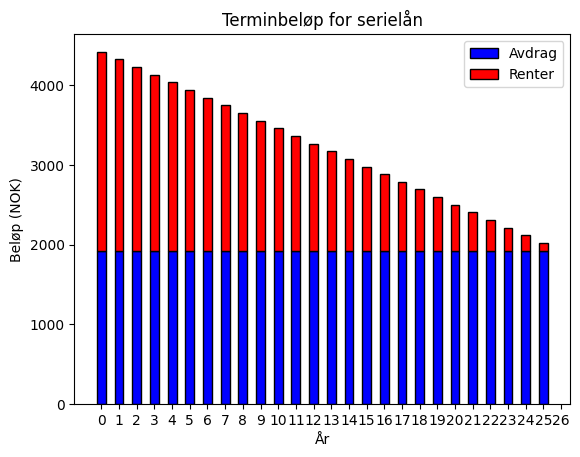

  År  Termin       Avdrag        Rente  Terminbeløp  Kumulativ Rente  \
   1       1  1923.076923  2500.000000  4423.076923      2500.000000   
   2       2  1923.076923  2403.846154  4326.923077      4903.846154   
   3       3  1923.076923  2307.692308  4230.769231      7211.538462   
   4       4  1923.076923  2211.538462  4134.615385      9423.076923   
   5       5  1923.076923  2115.384615  4038.461538     11538.461538   
   6       6  1923.076923  2019.230769  3942.307692     13557.692308   
   7       7  1923.076923  1923.076923  3846.153846     15480.769231   
   8       8  1923.076923  1826.923077  3750.000000     17307.692308   
   9       9  1923.076923  1730.769231  3653.846154     19038.461538   
  10      10  1923.076923  1634.615385  3557.692308     20673.076923   
  11      11  1923.076923  1538.461538  3461.538462     22211.538462   
  12      12  1923.076923  1442.307692  3365.384615     23653.846154   
  13      13  1923.076923  1346.153846  3269.230769     25000.00

In [5]:
# Serielån
import matplotlib.pyplot as plt
import pandas as pd

def beregn_serielån(lånebeløp, rente, antall_år, antall_perioder_per_år):
    antall_perioder = antall_år * antall_perioder_per_år
    terminbeløp_per_periode = lånebeløp / antall_perioder
    gjenværende_saldo = lånebeløp
    betalt_rente = []
    betalt_avdrag = []
    gjenværende_saldo_liste = []
    år_liste = []
    termin_liste = []
    for periode in range(antall_perioder):
        år = periode // antall_perioder_per_år + 1
        år_liste.append(år)
        termin_liste.append(periode + 1)
        betalt_rente_periode = rente / antall_perioder_per_år * gjenværende_saldo
        betalt_rente.append(betalt_rente_periode)
        betalt_avdrag_periode = terminbeløp_per_periode
        betalt_avdrag.append(betalt_avdrag_periode)
        gjenværende_saldo -= betalt_avdrag_periode
        gjenværende_saldo_liste.append(gjenværende_saldo)
    return år_liste, termin_liste, betalt_avdrag, betalt_rente, gjenværende_saldo_liste

def plott_lånebetalinger_serielån(år_liste, betalt_avdrag, betalt_rente, antall_år, antall_perioder_per_år):
    stolpebredde = 0.5 / antall_perioder_per_år
    x_pos = [i / antall_perioder_per_år for i in range(len(år_liste))]
    plt.bar(x_pos, betalt_avdrag, width=stolpebredde, align='center', label='Avdrag', edgecolor='black', linewidth=1, color='b')
    plt.bar(x_pos, betalt_rente, bottom=betalt_avdrag, width=stolpebredde, align='center', label='Renter', edgecolor='black', linewidth=1, color='r')
    plt.xticks(range(antall_år + 1))
    plt.xlabel('År')
    plt.ylabel('Beløp (NOK)')
    plt.title('Terminbeløp for serielån')
    plt.legend(loc='upper right')
    plt.grid(False)
    plt.show()

def lag_lånedataframe_serielån(år_liste, termin_liste, betalt_avdrag, betalt_rente):
    data = {
        'År': år_liste,
        'Termin': termin_liste,
        'Avdrag': betalt_avdrag,
        'Rente': betalt_rente,
        'Terminbeløp': [p + i for p, i in zip(betalt_avdrag, betalt_rente)],
        'Kumulativ Rente': pd.Series(betalt_rente).cumsum(),
        'Kumulativ Avdrag': pd.Series(betalt_avdrag).cumsum()
    }
    df = pd.DataFrame(data)
    df.index = [''] * len(df)  # Fjern radnumre
    return df

# Parametere for serielån
lånebeløp_serielån = 50000               # Lånebeløp, endres
rente_serielån = 0.05                    # Rente på lånet i desmaltall av prosenten %. Feks 2 % = 0.02
antall_år_serielån = 26                  # Antall år nedbetalingstid
antall_perioder_per_år_serielån = 1      # Antall terminer/perioder for hver gang du må betale iløpet av året

# Beregninger for serielån
år_liste_serielån, termin_liste_serielån, betalt_avdrag_serielån, betalt_rente_serielån, gjenværende_saldo_liste_serielån = beregn_serielån(
    lånebeløp_serielån, rente_serielån, antall_år_serielån, antall_perioder_per_år_serielån)

# Plotting for serielån
plott_lånebetalinger_serielån(år_liste_serielån, betalt_avdrag_serielån, betalt_rente_serielån, antall_år_serielån, antall_perioder_per_år_serielån)

# DataFrame for serielån
df_serielån = lag_lånedataframe_serielån(år_liste_serielån, termin_liste_serielån, betalt_avdrag_serielån, betalt_rente_serielån)
print(df_serielån)

In [ ]:
# Serielån versjon 2
import matplotlib.pyplot as plt
import pandas as pd

def beregn_serielån(lånebeløp, rente, antall_år, antall_perioder_per_år):
    """
    Beregner betalingsplan for et serielån.
    """
    antall_perioder = antall_år * antall_perioder_per_år
    avdrag_per_periode = lånebeløp / antall_perioder
    gjenværende_saldo = lånebeløp

    # Lister for å lagre resultater
    år_liste = []
    termin_liste = []
    betalt_rente = []
    betalt_avdrag = []
    gjenværende_saldo_liste = []

    for periode in range(antall_perioder):
        år = periode // antall_perioder_per_år + 1
        år_liste.append(år)
        termin_liste.append(periode + 1)

        rente_periode = rente / antall_perioder_per_år * gjenværende_saldo
        betalt_rente.append(rente_periode)
        betalt_avdrag.append(avdrag_per_periode)

        gjenværende_saldo -= avdrag_per_periode
        gjenværende_saldo_liste.append(gjenværende_saldo)

    return år_liste, termin_liste, betalt_avdrag, betalt_rente, gjenværende_saldo_liste

def plott_lånebetalinger_serielån(år_liste, betalt_avdrag, betalt_rente, antall_år, antall_perioder_per_år):
    """
    Plotter avdrag og renter over tid for et serielån.
    """
    x_pos = [år + (periode % antall_perioder_per_år) / antall_perioder_per_år 
             for periode, år in enumerate(år_liste)]
    stolpebredde = 0.5 / antall_perioder_per_år

    plt.figure(figsize=(10, 6))
    plt.bar(x_pos, betalt_avdrag, width=stolpebredde, label='Avdrag', color='blue', edgecolor='black')
    plt.bar(x_pos, betalt_rente, bottom=betalt_avdrag, width=stolpebredde, label='Renter', color='red', edgecolor='black')

    plt.xticks(range(1, antall_år + 1))
    plt.xlabel('År')
    plt.ylabel('Beløp (NOK)')
    plt.title('Betalingsplan for Serielån')
    plt.legend()
    plt.grid(False)
    plt.tight_layout()
    plt.show()

def lag_lånedataframe_serielån(år_liste, termin_liste, betalt_avdrag, betalt_rente):
    """
    Lager en pandas DataFrame med detaljer om serielånet.
    """
    df = pd.DataFrame({
        'År': år_liste,
        'Termin': termin_liste,
        'Avdrag': betalt_avdrag,
        'Rente': betalt_rente,
        'Terminbeløp': [a + r for a, r in zip(betalt_avdrag, betalt_rente)],
        'Kumulativ Rente': pd.Series(betalt_rente).cumsum(),
        'Kumulativ Avdrag': pd.Series(betalt_avdrag).cumsum()
    })
    df.index = [''] * len(df)  # Fjern radnumre
    return df

# Parametere for serielån
lånebeløp = 50000
rente = 0.05
antall_år = 26
antall_perioder_per_år = 1

# Beregning og visualisering
år_liste, termin_liste, betalt_avdrag, betalt_rente, gjenværende_saldo_liste = beregn_serielån(
    lånebeløp, rente, antall_år, antall_perioder_per_år)

plott_lånebetalinger_serielån(år_liste, betalt_avdrag, betalt_rente, antall_år, antall_perioder_per_år)

df_serielån = lag_lånedataframe_serielån(år_liste, termin_liste, betalt_avdrag, betalt_rente)
print(df_serielån)

In [ ]:
# Annuitetslån
import matplotlib.pyplot as plt
import pandas as pd

def beregn_annuitetslån(lånebeløp, rente, antall_år, antall_perioder_per_år, terminbeløp_per_periode=None):
    antall_perioder = antall_år * antall_perioder_per_år
    rente_per_periode = rente / antall_perioder_per_år
    
    if terminbeløp_per_periode is None:
        annuitetsfaktor = (rente_per_periode * (1 + rente_per_periode) ** antall_perioder) / ((1 + rente_per_periode) ** antall_perioder - 1)
        terminbeløp_per_periode = lånebeløp * annuitetsfaktor

    gjenværende_saldo = lånebeløp
    betalt_rente = []
    betalt_avdrag = []
    gjenværende_saldo_liste = []
    år_liste = []
    termin_liste = []
    for periode in range(antall_perioder):
        år = periode // antall_perioder_per_år + 1
        år_liste.append(år)
        termin_liste.append(periode + 1)
        betalt_rente_periode = rente_per_periode * gjenværende_saldo
        betalt_rente.append(betalt_rente_periode)
        betalt_avdrag_periode = terminbeløp_per_periode - betalt_rente_periode
        betalt_avdrag.append(betalt_avdrag_periode)
        gjenværende_saldo -= betalt_avdrag_periode
        gjenværende_saldo_liste.append(gjenværende_saldo)
    return år_liste, termin_liste, betalt_avdrag, betalt_rente, gjenværende_saldo_liste

def plott_lånebetalinger(år_liste, betalt_avdrag, betalt_rente, antall_år, antall_perioder_per_år):
    stolpebredde = 0.5 / antall_perioder_per_år
    x_pos = [i / antall_perioder_per_år for i in range(len(år_liste))]
    plt.bar(x_pos, betalt_avdrag, width=stolpebredde, align='center', label='Avdrag', edgecolor='black', linewidth=1, color='b')
    plt.bar(x_pos, betalt_rente, bottom=betalt_avdrag, width=stolpebredde, align='center', label='Renter', edgecolor='black', linewidth=1, color='r')
    plt.xticks(range(antall_år + 1))
    plt.xlabel('År')
    plt.ylabel('Beløp (NOK)')
    plt.title('Terminbeløp for annuitetslån')
    plt.legend(loc='upper right')
    plt.grid(False)
    plt.show()

def lag_lånedataframe(år_liste, termin_liste, betalt_avdrag, betalt_rente):
    data = {
        'År': år_liste,
        'Termin': termin_liste,
        'Avdrag': betalt_avdrag,
        'Rente': betalt_rente,
        'Terminbeløp': [p + i for p, i in zip(betalt_avdrag, betalt_rente)],
        'Kumulativ Rente': pd.Series(betalt_rente).cumsum(),
        'Kumulativ Avdrag': pd.Series(betalt_avdrag).cumsum()
    }
    df = pd.DataFrame(data)
    df.index = [''] * len(df)  # Fjern radnumre
    return df

# Parametere for annuitetslån
lånebeløp = 1500000                # Lånebeløp, endres
rente = 0.035                      # Rente på lånet i desmaltall av prosenten %. Feks 2 % = 0.02
antall_år = 1                      # Antall år nedbetalingstid
antall_perioder_per_år = 1         # Antall terminer/perioder for hver gang du må betale iløpet av året
terminbeløp_per_periode = 132000   # Sett til None hvis du vil beregne terminbeløpet automatisk

# Beregninger
år_liste, termin_liste, betalt_avdrag, betalt_rente, gjenværende_saldo_liste = beregn_annuitetslån(
    lånebeløp, rente, antall_år, antall_perioder_per_år, terminbeløp_per_periode)

# Plotting
plott_lånebetalinger(år_liste, betalt_avdrag, betalt_rente, antall_år, antall_perioder_per_år)

# DataFrame
df = lag_lånedataframe(år_liste, termin_liste, betalt_avdrag, betalt_rente)
print(df)

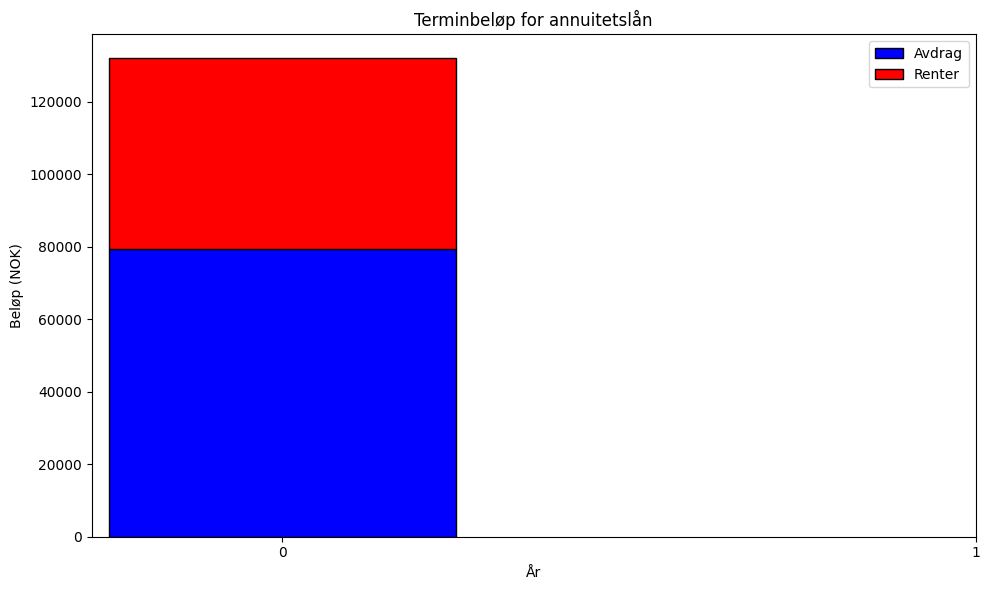

  År  Termin   Avdrag    Rente  Terminbeløp  Kumulativ Rente  Kumulativ Avdrag
   1       1  79500.0  52500.0     132000.0          52500.0           79500.0


In [6]:
# Annuitetslån versjon 2
import matplotlib.pyplot as plt
import pandas as pd

def beregn_annuitetslån(lånebeløp, rente, antall_år, antall_perioder_per_år, terminbeløp_per_periode=None):
    """
    Beregner betalingsplan for et annuitetslån.
    """
    antall_perioder = antall_år * antall_perioder_per_år
    rente_per_periode = rente / antall_perioder_per_år

    if terminbeløp_per_periode is None:
        annuitetsfaktor = (rente_per_periode * (1 + rente_per_periode) ** antall_perioder) / \
                          ((1 + rente_per_periode) ** antall_perioder - 1)
        terminbeløp_per_periode = lånebeløp * annuitetsfaktor

    gjenværende_saldo = lånebeløp
    år_liste, termin_liste = [], []
    betalt_rente, betalt_avdrag, gjenværende_saldo_liste = [], [], []

    for periode in range(antall_perioder):
        år = periode // antall_perioder_per_år + 1
        år_liste.append(år)
        termin_liste.append(periode + 1)

        rente_periode = rente_per_periode * gjenværende_saldo
        avdrag_periode = terminbeløp_per_periode - rente_periode
        gjenværende_saldo -= avdrag_periode
        betalt_rente.append(rente_periode)
        betalt_avdrag.append(avdrag_periode)
        gjenværende_saldo_liste.append(gjenværende_saldo)

    return år_liste, termin_liste, betalt_avdrag, betalt_rente, gjenværende_saldo_liste

def plott_lånebetalinger(år_liste, betalt_avdrag, betalt_rente, antall_år, antall_perioder_per_år):
    """
    Plotter en graf som viser fordeling av avdrag og renter over tid.
    """
    x_pos = [i / antall_perioder_per_år for i in range(len(år_liste))]
    stolpebredde = 0.5 / antall_perioder_per_år

    plt.figure(figsize=(10, 6))
    plt.bar(x_pos, betalt_avdrag, width=stolpebredde, label='Avdrag', color='blue', edgecolor='black')
    plt.bar(x_pos, betalt_rente, bottom=betalt_avdrag, width=stolpebredde, label='Renter', color='red', edgecolor='black')

    plt.xticks(range(antall_år + 1))
    plt.xlabel('År')
    plt.ylabel('Beløp (NOK)')
    plt.title('Terminbeløp for annuitetslån')
    plt.legend()
    plt.grid(False)
    plt.tight_layout()
    plt.show()

def lag_lånedataframe(år_liste, termin_liste, betalt_avdrag, betalt_rente):
    """
    Lager en pandas DataFrame med detaljer om hver betalingstermin.
    """
    df = pd.DataFrame({
        'År': år_liste,
        'Termin': termin_liste,
        'Avdrag': betalt_avdrag,
        'Rente': betalt_rente,
        'Terminbeløp': [a + r for a, r in zip(betalt_avdrag, betalt_rente)],
        'Kumulativ Rente': pd.Series(betalt_rente).cumsum(),
        'Kumulativ Avdrag': pd.Series(betalt_avdrag).cumsum()
    })
    df.index = [''] * len(df)  # Fjern radnumre
    return df

# Parametere for annuitetslån
lånebeløp = 1500000
rente = 0.035
antall_år = 1
antall_perioder_per_år = 1
terminbeløp_per_periode = 132000

# Beregning
år_liste, termin_liste, betalt_avdrag, betalt_rente, gjenværende_saldo_liste = beregn_annuitetslån(
    lånebeløp, rente, antall_år, antall_perioder_per_år, terminbeløp_per_periode)

# Plotting
plott_lånebetalinger(år_liste, betalt_avdrag, betalt_rente, antall_år, antall_perioder_per_år)

# DataFrame
df = lag_lånedataframe(år_liste, termin_liste, betalt_avdrag, betalt_rente)
print(df)

In [3]:
# Kombinert lån ved hjelp av gemini 3.0
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output

# --- 1. Beregningslogikk (Kombinert) ---
def beregn_låneplan(lånebeløp, rente_prosent, antall_år, terminer_per_år, lånetype):
    # Konverterer input
    rente = rente_prosent / 100
    antall_perioder = antall_år * terminer_per_år
    rente_per_periode = rente / terminer_per_år
    
    data = []
    gjenværende_saldo = lånebeløp
    
    # Forhåndsberegning for annuitetslån (fast terminbeløp)
    annuitet_terminbeløp = 0
    if lånetype == 'Annuitetslån':
        if rente > 0:
            nevner = (1 + rente_per_periode) ** antall_perioder - 1
            annuitetsfaktor = (rente_per_periode * (1 + rente_per_periode) ** antall_perioder) / nevner
            annuitet_terminbeløp = lånebeløp * annuitetsfaktor
        else:
            annuitet_terminbeløp = lånebeløp / antall_perioder

    # Løkke gjennom alle periodene
    for i in range(1, antall_perioder + 1):
        år = (i - 1) // terminer_per_år + 1
        
        betalt_rente = gjenværende_saldo * rente_per_periode
        
        if lånetype == 'Serielån':
            # Serielån: Fast avdrag
            avdrag = lånebeløp / antall_perioder
            terminbeløp = avdrag + betalt_rente
        else:
            # Annuitetslån: Fast terminbeløp (men juster siste termin for øreavrunding)
            terminbeløp = annuitet_terminbeløp
            avdrag = terminbeløp - betalt_rente
            # Sørg for at vi ikke betaler mer enn restgjelden på slutten
            if avdrag > gjenværende_saldo:
                avdrag = gjenværende_saldo
                terminbeløp = avdrag + betalt_rente

        gjenværende_saldo -= avdrag
        
        # Lagre data (avrundet til 2 desimaler for ryddighet)
        data.append({
            'År': år,
            'Termin': i,
            'Rente': round(betalt_rente, 2),
            'Avdrag': round(avdrag, 2),
            'Terminbeløp': round(terminbeløp, 2),
            'Restgjeld': round(max(0, gjenværende_saldo), 2)
        })
        
    df = pd.DataFrame(data)
    return df

# --- 2. Plotting og Visning ---
def vis_dashboard(lånebeløp, rente, år, terminer, lånetype):
    # Beregn data
    df = beregn_låneplan(lånebeløp, rente, år, terminer, lånetype)
    
    # Totalsummer
    totalt_innbetalt = df['Terminbeløp'].sum()
    total_rente = df['Rente'].sum()
    
    # Oppsett for plotting (To grafer side ved side)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Graf 1: Terminbeløp sammensetning (Stacked Bar)
    # For å unngå rotete x-akse hvis mange terminer, plotter vi bare hvert år hvis det er mange
    x_vals = df['Termin']
    width = 0.8
    
    ax1.bar(x_vals, df['Avdrag'], width=width, label='Avdrag', color='#4CAF50', alpha=0.8)
    ax1.bar(x_vals, df['Rente'], bottom=df['Avdrag'], width=width, label='Renter', color='#F44336', alpha=0.8)
    
    ax1.set_title(f'Betalingsplan: {lånetype}')
    ax1.set_xlabel('Termin nummer')
    ax1.set_ylabel('Beløp (NOK)')
    ax1.legend()
    ax1.grid(axis='y', linestyle='--', alpha=0.5)

    # Graf 2: Restgjeld utvikling
    ax2.plot(df['Termin'], df['Restgjeld'], color='#2196F3', linewidth=3)
    ax2.fill_between(df['Termin'], df['Restgjeld'], color='#2196F3', alpha=0.1)
    ax2.set_title('Utvikling av Restgjeld')
    ax2.set_xlabel('Termin nummer')
    ax2.set_ylabel('Restgjeld (NOK)')
    ax2.grid(True, linestyle='--', alpha=0.5)
    ax2.set_ylim(bottom=0)
    
    plt.tight_layout()
    plt.show()
    
    # Vis nøkkeltall og tabell
    print(f"--- SAMMENDRAG FOR {lånetype.upper()} ---")
    print(f"Lånebeløp:       {lånebeløp:,.2f} kr")
    print(f"Total rentekost: {total_rente:,.2f} kr")
    print(f"Totalt å betale: {totalt_innbetalt:,.2f} kr")
    print("\n--- DETALJERT NEDBETALINGSPLAN (Første 10 terminer) ---")
    display(df.head(10).style.format("{:.2f}"))

# --- 3. Interaktive Widgets ---
style = {'description_width': 'initial'}

widget_beløp = widgets.IntSlider(value=500000, min=10000, max=5000000, step=10000, description='Lånebeløp (kr):', style=style)
widget_rente = widgets.FloatSlider(value=3.5, min=0.1, max=15.0, step=0.1, description='Rente (%):', style=style)
widget_år = widgets.IntSlider(value=10, min=1, max=40, step=1, description='Antall år:', style=style)
widget_terminer = widgets.Dropdown(options=[('Årlig', 1), ('Månedlig', 12), ('Kvartalsvis', 4)], value=1, description='Betalingsfrekvens:', style=style)
widget_type = widgets.Dropdown(options=['Serielån', 'Annuitetslån'], value='Serielån', description='Lånetype:', style=style)

ui = widgets.HBox([
    widgets.VBox([widget_beløp, widget_rente, widget_år]), 
    widgets.VBox([widget_terminer, widget_type])
])

out = widgets.interactive_output(vis_dashboard, {
    'lånebeløp': widget_beløp, 
    'rente': widget_rente, 
    'år': widget_år, 
    'terminer': widget_terminer, 
    'lånetype': widget_type
})

display(ui, out)

Output()

In [6]:
# Økonomiske beregninger oppgaver fra 3.7 og 3.8
import math
import matplotlib.pyplot as plt

# --- Hjelpefunksjoner for robust input ---
def safe_float(prompt):
    """Les inn tall som float, støtter komma, punktum og tusenskilletegn."""
    while True:
        try:
            value = input(prompt).replace(",", ".").replace(" ", "")
            return float(value)
        except ValueError:
            print("Ugyldig tallformat! Prøv igjen (bruk f.eks. 1234.56 eller 1,234.56).")

def safe_int(prompt):
    """Les inn tall som int, støtter tusenskilletegn."""
    while True:
        try:
            value = input(prompt).replace(" ", "")
            return int(value)
        except ValueError:
            print("Ugyldig heltall! Prøv igjen (bruk f.eks. 12 eller 1200).")

# --- Beregningsfunksjoner ---
def beregn_overskudd():
    inntekt = safe_float("Oppgi netto inntekt (kr): ")
    utgifter = safe_float("Oppgi totale utgifter (kr): ")
    overskudd = inntekt - utgifter
    print(f"Overskuddet ditt er: {overskudd:.2f} kr")

def beregn_vekstfaktor():
    rente = safe_float("Oppgi månedlig rente i prosent: ")
    vekstfaktor = (1 + rente/100)**12
    årlig_rente = (vekstfaktor - 1)*100
    print(f"Årlig vekstfaktor: {vekstfaktor:.4f}")
    print(f"Årlig rente: {årlig_rente:.2f}%")

def gjeld_etter_tid():
    beløp = safe_float("Oppgi opprinnelig gjeld (kr): ")
    rente = safe_float("Oppgi månedlig rente i prosent: ")
    måneder = safe_int("Oppgi antall måneder: ")
    sluttbeløp = beløp * (1 + rente/100)**måneder
    print(f"Gjelden etter {måneder} måneder: {sluttbeløp:.2f} kr")
    print(f"Renter betalt: {sluttbeløp - beløp:.2f} kr")

def dobbel_gjeld_tid():
    rente = safe_float("Oppgi månedlig rente i prosent: ")
    tid = math.log(2) / math.log(1 + rente/100)
    print(f"Gjelden dobler seg etter ca. {tid:.0f} måneder ({tid/12:.2f} år)")

def annuitetslån():
    lånebeløp = safe_float("Oppgi lånebeløp (kr): ")
    terminbeløp = safe_float("Oppgi terminbeløp (kr): ")
    terminer = safe_int("Oppgi antall terminer: ")
    total = terminbeløp * terminer
    print(f"Total kostnad: {total:.2f} kr")
    print(f"Renter og gebyrer: {total - lånebeløp:.2f} kr")

def ferietur_kostnad():
    terminbeløp = safe_float("Oppgi terminbeløp (kr): ")
    terminer = safe_int("Oppgi antall terminer: ")
    første_betaling = safe_float("Oppgi første betaling (kr): ")
    total = terminbeløp * terminer - 1301.39 + første_betaling
    print(f"Ferieturen koster totalt: {total:.2f} kr")

def kredittkort_kostnad():
    beløp = safe_float("Oppgi beløp (kr): ")
    rabatt = safe_float("Oppgi rabatt i prosent: ")
    rente = safe_float("Oppgi månedlig rente i prosent: ")
    måneder = safe_int("Oppgi antall måneder: ")
    beløp_med_rabatt = beløp * (1 - rabatt/100)
    sluttbeløp = beløp_med_rabatt * (1 + rente/100)**måneder
    print(f"Beløp med rabatt: {beløp_med_rabatt:.2f} kr")
    print(f"Beløp etter {måneder} måneder med rente: {sluttbeløp:.2f} kr")

def vis_gjeldsgraf():
    beløp = safe_float("Oppgi opprinnelig gjeld (kr): ")
    rente = safe_float("Oppgi månedlig rente i prosent: ")
    måneder = safe_int("Oppgi antall måneder: ")
    gjeld = [beløp * (1 + rente/100)**m for m in range(måneder+1)]
    plt.plot(range(måneder+1), gjeld)
    plt.title("Gjeldsutvikling over tid")
    plt.xlabel("Måneder")
    plt.ylabel("Gjeld (kr)")
    plt.grid(True)
    plt.show()

# --- Meny ---
def meny():
    while True:
        print("\n--- Matematikkmester ---")
        print("1: Beregn overskudd")
        print("2: Beregn vekstfaktor og årlig rente")
        print("3: Beregn gjeld etter tid")
        print("4: Dobbel gjeld tid")
        print("5: Annuitetslån")
        print("6: Ferietur kostnad")
        print("7: Kredittkortkostnad med rabatt og rente")
        print("8: Vis gjeldsgraf")
        print("9: Avslutt")
        valg = input("Velg en oppgave (1-9): ")
        
        if valg == "1": beregn_overskudd()
        elif valg == "2": beregn_vekstfaktor()
        elif valg == "3": gjeld_etter_tid()
        elif valg == "4": dobbel_gjeld_tid()
        elif valg == "5": annuitetslån()
        elif valg == "6": ferietur_kostnad()
        elif valg == "7": kredittkort_kostnad()
        elif valg == "8": vis_gjeldsgraf()
        elif valg == "9":
            print("Avslutter programmet. Ha en fin dag!")
            break
        else:
            print("Ugyldig valg, prøv igjen.")

# Start programmet
meny()


--- Matematikkmester ---
1: Beregn overskudd
2: Beregn vekstfaktor og årlig rente
3: Beregn gjeld etter tid
4: Dobbel gjeld tid
5: Annuitetslån
6: Ferietur kostnad
7: Kredittkortkostnad med rabatt og rente
8: Vis gjeldsgraf
9: Avslutt


Velg en oppgave (1-9):  3
Oppgi opprinnelig gjeld (kr):  20000
Oppgi månedlig rente i prosent:  1,2
Oppgi antall måneder:  12


Gjelden etter 12 måneder: 23077.89 kr
Renter betalt: 3077.89 kr

--- Matematikkmester ---
1: Beregn overskudd
2: Beregn vekstfaktor og årlig rente
3: Beregn gjeld etter tid
4: Dobbel gjeld tid
5: Annuitetslån
6: Ferietur kostnad
7: Kredittkortkostnad med rabatt og rente
8: Vis gjeldsgraf
9: Avslutt


Velg en oppgave (1-9):  9


Avslutter programmet. Ha en fin dag!
